### Import libraries

In [13]:
import pandas as pd 

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR

### Load dataset

In [3]:
df = pd.read_csv('./Dataset/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Seperating attributes and labels

In [9]:
x = df['YearsExperience'].values.reshape(-1,1)
y = df['Salary']

### Model fitting

In [14]:
model = SVR()

parameters = {
	'kernel':['rbf'],
	'C':[1000, 10000, 100000],
	'gamma':[0.5, 0.05, 0.005]
}

grid_search = GridSearchCV(model, parameters)
grid_search.fit(x, y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [15]:
print(grid_search.best_params_)

{'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}


In [16]:
new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(x, y)

SVR(C=100000, gamma=0.005)

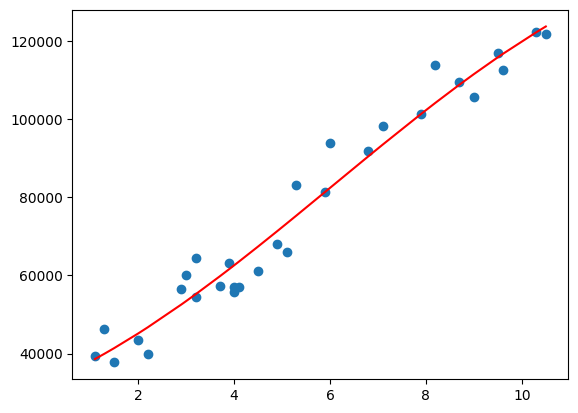

In [17]:
plt.scatter(x,y)
plt.plot(x, new_model.predict(x), color='red')